Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 78ms/step - accuracy: 0.3897 - loss: 1.7200 - val_accuracy: 0.5460 - val_loss: 1.2971
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.5386 - loss: 1.3201 - val_accuracy: 0.5639 - val_loss: 1.2378
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.5614 - loss: 1.2568 - val_accuracy: 0.5764 - val_loss: 1.1964
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.5740 - loss: 1.2195 - val_accuracy: 0.5837 - val_loss: 1.1781
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.5834 - loss: 1.1848 - val_accuracy: 0.5911 - val_loss: 1.1598
313/313 - 13s - 42ms/step - accuracy: 0.5911 - loss: 1.1598
Test Accuracy: 0.5910999774932861


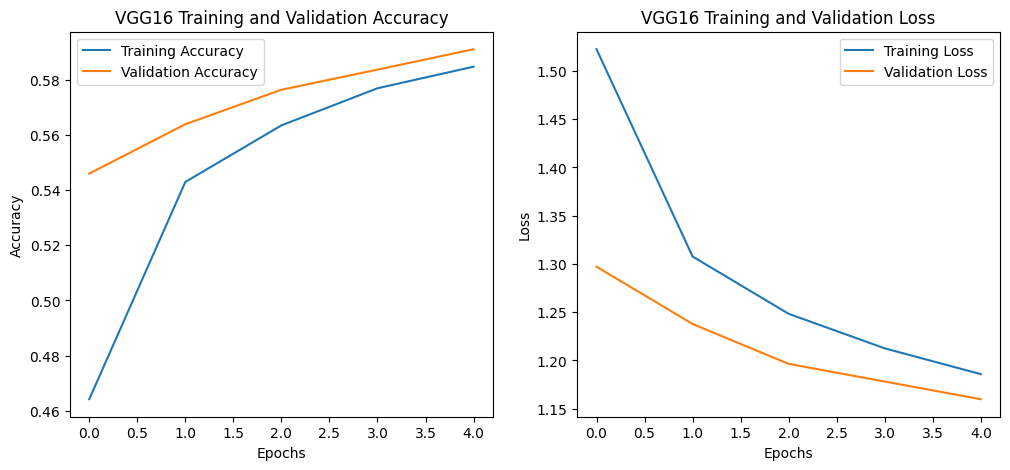

In [1]:
import os
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# CIFAR-10 數據集目錄
data_dir = "data/cifar-10-batches-py"

# 定義讀取函數
def load_cifar10_batch(batch_filename):
    with open(batch_filename, 'rb') as f:
        batch = pickle.load(f, encoding='latin1')
        data = batch['data']
        labels = batch['labels']
        # 轉換數據格式
        data = data.reshape((len(data), 3, 32, 32)).transpose(0, 2, 3, 1)
        return data, labels

def load_cifar10_data(data_dir):
    # 加載訓練數據
    x_train, y_train = [], []
    for i in range(1, 6):  # cifar-10 有5個訓練批次
        batch_file = os.path.join(data_dir, f"data_batch_{i}")
        data, labels = load_cifar10_batch(batch_file)
        x_train.append(data)
        y_train += labels
    x_train = np.concatenate(x_train)
    y_train = np.array(y_train)

    # 加載測試數據
    test_file = os.path.join(data_dir, "test_batch")
    x_test, y_test = load_cifar10_batch(test_file)
    y_test = np.array(y_test)

    return (x_train, y_train), (x_test, y_test)

# 加載 CIFAR-10 數據
(x_train, y_train), (x_test, y_test) = load_cifar10_data(data_dir)

# 正規化圖片數據
x_train = x_train / 255.0
x_test = x_test / 255.0

# 將標籤轉換為 one-hot 編碼
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 加載 VGG16 預訓練模型
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

# 構建模型
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5,
    batch_size=64
)

# 評估模型
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

# 繪製訓練準確率和驗證準確率
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('VGG16 Training and Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG16 Training and Validation Loss')
plt.legend()

plt.show()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 37s 0us/step
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.3886 - loss: 1.7310 - val_accuracy: 0.5306 - val_loss: 1.3429
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.5115 - loss: 1.3836 - val_accuracy: 0.5531 - val_loss: 1.2660
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.5373 - loss: 1.3141 - val_accuracy: 0.5670 - val_loss: 1.2353
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.5511 - loss: 1.2707 - val_accuracy: 0.5739 - val_loss: 1.2052
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.5628 - loss: 1.2371 - val_accuracy: 0.5769 - val_loss: 1.2018
313/313 - 17s - 53ms/step - accuracy: 0.5769 - loss: 1.2018
Test Accuracy: 0.5769000053405762


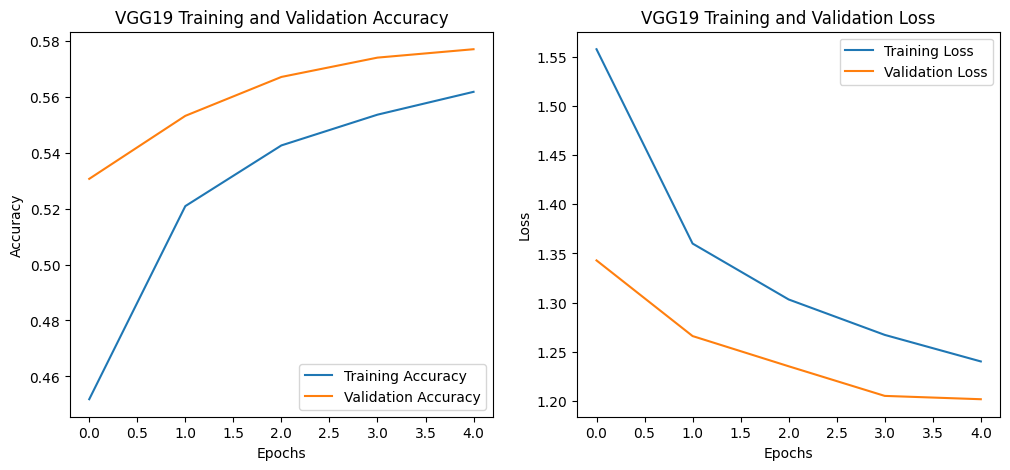

In [2]:
import os
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG19  # 修改為 VGG19
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# CIFAR-10 數據集目錄
data_dir = "data/cifar-10-batches-py"

# 定義讀取函數
def load_cifar10_batch(batch_filename):
    with open(batch_filename, 'rb') as f:
        batch = pickle.load(f, encoding='latin1')
        data = batch['data']
        labels = batch['labels']
        # 轉換數據格式
        data = data.reshape((len(data), 3, 32, 32)).transpose(0, 2, 3, 1)
        return data, labels

def load_cifar10_data(data_dir):
    # 加載訓練數據
    x_train, y_train = [], []
    for i in range(1, 6):  # cifar-10 有5個訓練批次
        batch_file = os.path.join(data_dir, f"data_batch_{i}")
        data, labels = load_cifar10_batch(batch_file)
        x_train.append(data)
        y_train += labels
    x_train = np.concatenate(x_train)
    y_train = np.array(y_train)

    # 加載測試數據
    test_file = os.path.join(data_dir, "test_batch")
    x_test, y_test = load_cifar10_batch(test_file)
    y_test = np.array(y_test)

    return (x_train, y_train), (x_test, y_test)

# 加載 CIFAR-10 數據
(x_train, y_train), (x_test, y_test) = load_cifar10_data(data_dir)

# 正規化圖片數據
x_train = x_train / 255.0
x_test = x_test / 255.0

# 將標籤轉換為 one-hot 編碼
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 加載 VGG19 預訓練模型
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

# 構建模型
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5,  # 設置更小的 epochs 以快速測試，根據需求可調整
    batch_size=64
)

# 評估模型
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

# 繪製訓練準確率和驗證準確率
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('VGG19 Training and Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG19 Training and Validation Loss')
plt.legend()

plt.show()